                  date       co     no    no2    o3    so2   pm2_5    pm10  \
0  2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1  2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2  2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3  2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4  2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3  
0   5.83  
1   7.66  
2  11.40  
3  13.55  
4  14.19  
                      date            co          no         no2          o3  \
count                  561    561.000000  561.000000  561.000000  561.000000   
mean   2023-01-12 16:00:00   3814.942210   51.181979   75.292496   30.141943   
min    2023-01-01 00:00:00    654.220000    0.000000   13.370000    0.000000   
25%    2023-01-06 20:00:00   1708.980000    3.380000   44.550000    0.070000   
50%    2023-01-12 16:00:00   2590.180000   13.300000   63.750000 

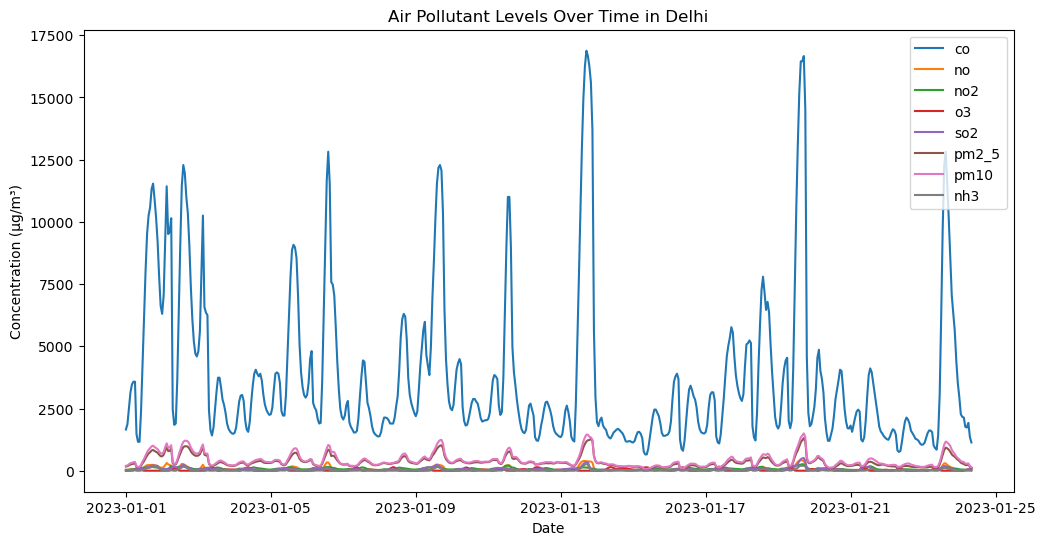

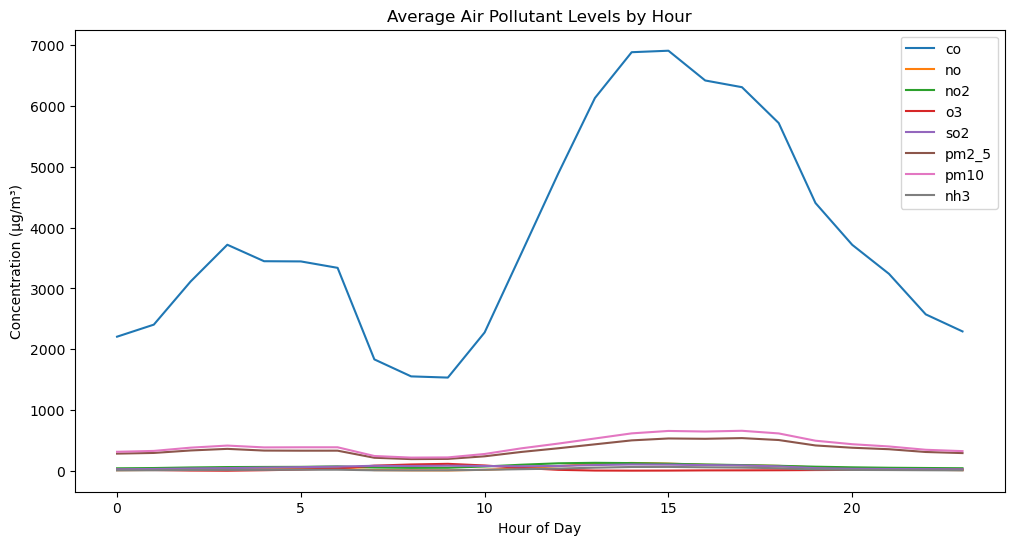

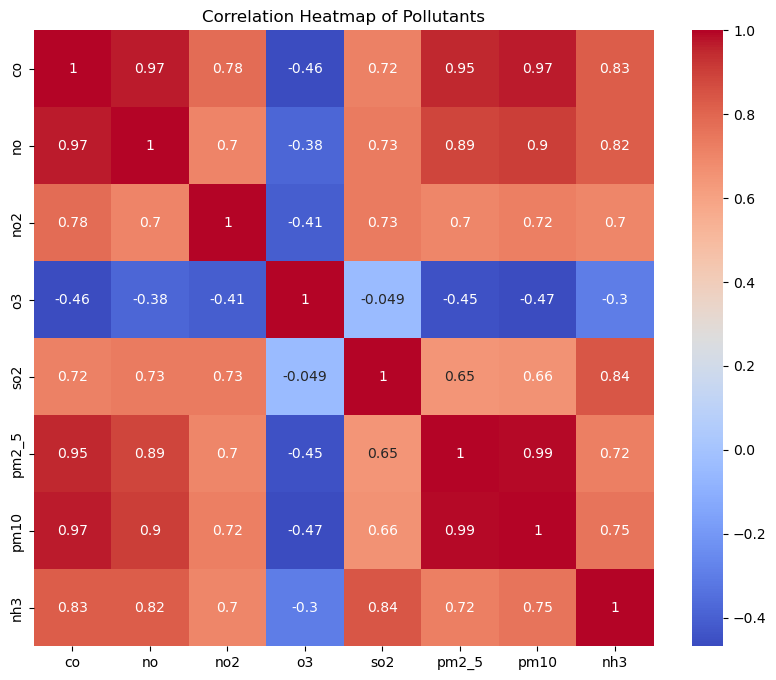

In [7]:
import pandas as pd

df = pd.read_csv(r'C:\Users\saran\Downloads\delhiaqi.csv')
print(df.head())
df['date'] = pd.to_datetime(df['date'])
df.dropna(inplace=True)
print(df.describe())

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for column in ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']:
    plt.plot(df['date'], df[column], label=column)

plt.title('Air Pollutant Levels Over Time in Delhi')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.show()


# Extract hour and month for further analysis
df['hour'] = df['date'].dt.hour
df['month'] = df['date'].dt.month

# Average pollutant levels by hour
hourly_avg = df.groupby('hour')[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].mean()

# Plot hourly averages
hourly_avg.plot(figsize=(12, 6))
plt.title('Average Air Pollutant Levels by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.show()


import seaborn as sns

correlation_matrix = df[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Pollutants')
plt.show()

